# Cifar-100 이미지 분류

## 전체 데이터 중 일부분만 사용

#### 데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 42s 0us/step


In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

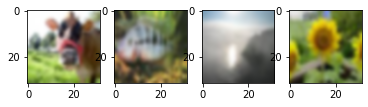

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [5]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
* X: 실수형으로 정규화
* Y: 1-Hot Encoding

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트하기

In [8]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, 
                                                    test_size=.2, random_state=seed)

#### 모형 구현

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Activation
import numpy as np

np.random.seed(0)

In [10]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [12]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,
                    validation_data=(X_test, Y_test), verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 7s 893us/sample - loss: 4.6064 - accuracy: 0.0124 - val_loss: 4.5859 - val_accuracy: 0.0245
Epoch 2/100
8000/8000 [==============================] - 7s 823us/sample - loss: 4.5298 - accuracy: 0.0259 - val_loss: 4.3969 - val_accuracy: 0.0370
Epoch 3/100
8000/8000 [==============================] - 7s 842us/sample - loss: 4.3802 - accuracy: 0.0334 - val_loss: 4.2401 - val_accuracy: 0.0730
Epoch 4/100
8000/8000 [==============================] - 7s 849us/sample - loss: 4.2554 - accuracy: 0.0538 - val_loss: 4.0885 - val_accuracy: 0.0960
Epoch 5/100
8000/8000 [==============================] - 7s 845us/sample - loss: 4.1300 - accuracy: 0.0720 - val_loss: 3.9747 - val_accuracy: 0.1145
Epoch 6/100
8000/8000 [==============================] - 7s 837us/sample - loss: 4.0322 - accuracy: 0.0885 - val_loss: 3.8715 - val_accuracy: 0.1345
Epoch 7/100
8000/8000 [==============================] - 7

8000/8000 [==============================] - 7s 843us/sample - loss: 2.1513 - accuracy: 0.4334 - val_loss: 2.9994 - val_accuracy: 0.2860
Epoch 56/100
8000/8000 [==============================] - 7s 837us/sample - loss: 2.1145 - accuracy: 0.4380 - val_loss: 3.0044 - val_accuracy: 0.2830
Epoch 57/100
8000/8000 [==============================] - 7s 837us/sample - loss: 2.1091 - accuracy: 0.4396 - val_loss: 3.0053 - val_accuracy: 0.2970
Epoch 58/100
8000/8000 [==============================] - 7s 840us/sample - loss: 2.0722 - accuracy: 0.4451 - val_loss: 3.0195 - val_accuracy: 0.2830
Epoch 59/100
8000/8000 [==============================] - 7s 840us/sample - loss: 2.0439 - accuracy: 0.4511 - val_loss: 3.0275 - val_accuracy: 0.2855
Epoch 60/100
8000/8000 [==============================] - 7s 838us/sample - loss: 2.0156 - accuracy: 0.4636 - val_loss: 3.0386 - val_accuracy: 0.2860
Epoch 61/100
8000/8000 [==============================] - 7s 839us/sample - loss: 1.9740 - accuracy: 0.4734 - val

In [14]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2000/2000 [==============================] - 1s 256us/sample - loss: 3.2619 - accuracy: 0.2930

 Test Accuracy: 0.2930


In [17]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

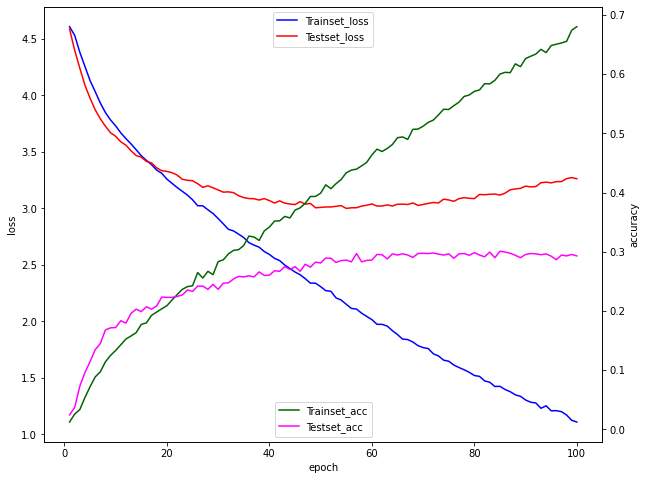

In [18]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()